In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,StratifiedKFold,cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold,KFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
import logging
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# X = dataset.drop(columns=['Output','Cluster'])
# y = dataset['Output']

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
k_fold = KFold(shuffle=True,random_state=100)

In [2]:
dataset = pd.read_csv("../cluster_data.csv")
dataset_ = dataset.copy()

In [3]:
def evalution_matric(y_true, y_pred):
    metrics_data = {
        'accuracy': accuracy_score(y_true,y_pred),
        'recall' : recall_score(y_true,y_pred),
        'precision': precision_score(y_true,y_pred),
        'f1_score' : f1_score(y_true,y_pred),
        'aus_score' : roc_auc_score(y_true,y_pred)
        }
    return metrics_data



    


In [72]:
def experiment(X,y):
    result_dict = {}
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    
    print("Using logistcregression")
    model = LogisticRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['LogisticRegression'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    # # Display confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
   
    
    print("Using DecisionTree")
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['DecisionTree'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Using Randomforest")
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['Randomforest'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Using svc")
    model = SVC()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['SVC'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Using KNeighborsClassifier")
    model = KNeighborsClassifier(n_neighbors=2)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['KNN'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    print("Using GaussianNB")
    model = GaussianNB()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['GaussianNB'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


    print("Using XGBClassifier")
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['XGBClassifier'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return pd.DataFrame(result_dict)
     

Using logistcregression


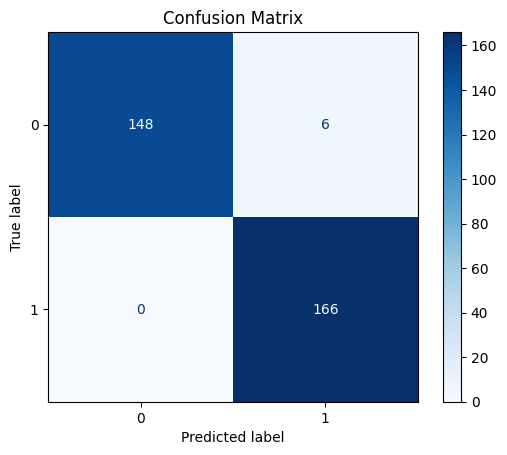

Using DecisionTree


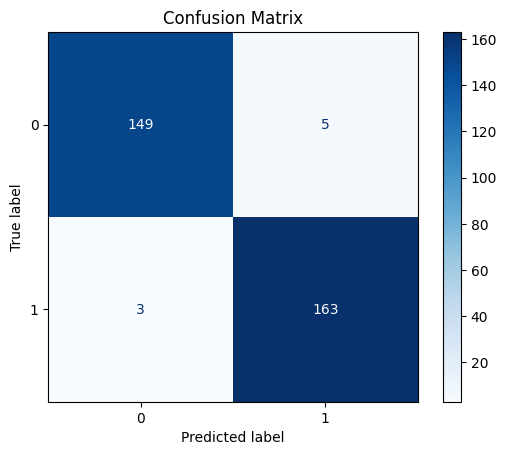

Using Randomforest


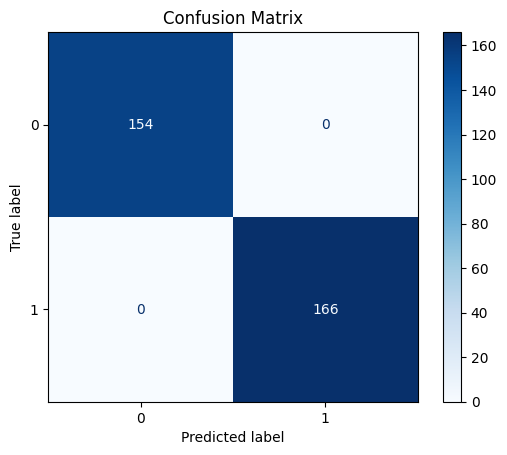

Using svc


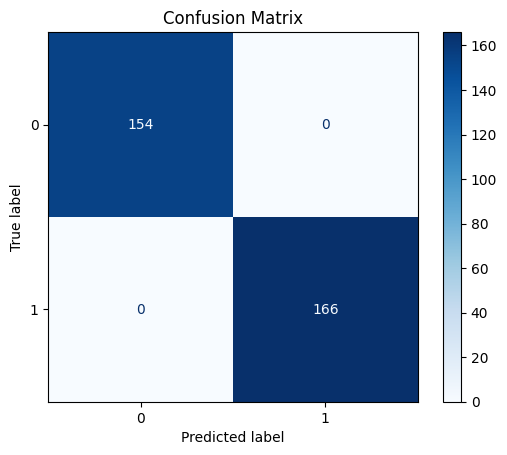

Using KNeighborsClassifier


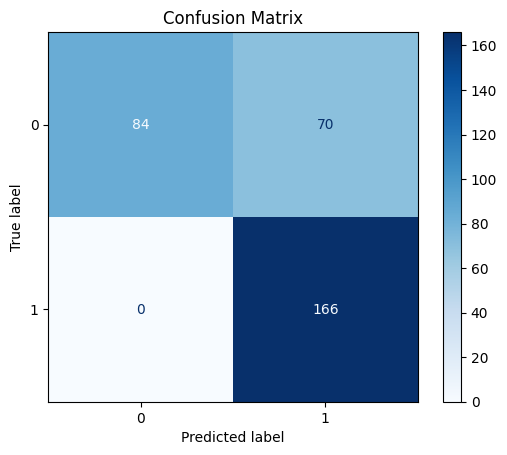

Using GaussianNB


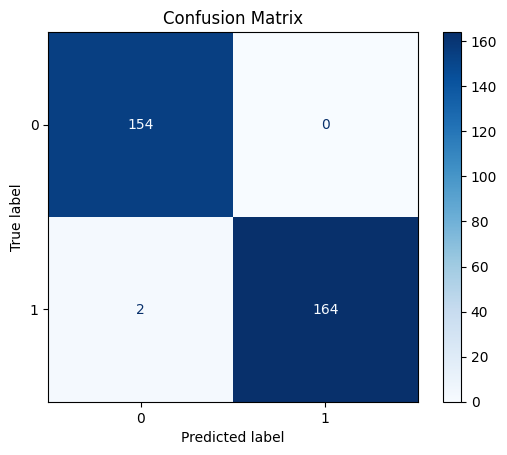

Using XGBClassifier


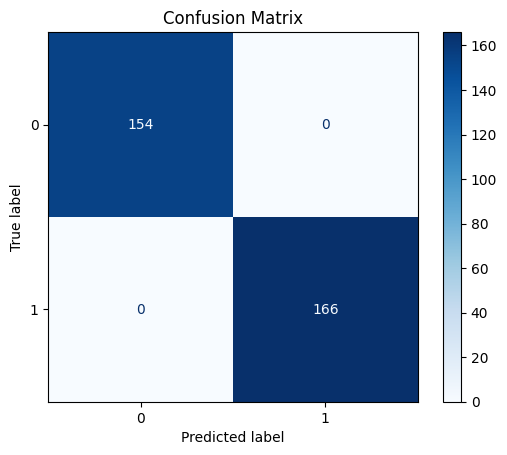

                LogisticRegression  DecisionTree  Randomforest  SVC       KNN  \
training_score            1.000000      1.000000           1.0  1.0  1.000000   
test_score                0.981250      0.975000           1.0  1.0  0.781250   
accuracy                  0.981250      0.975000           1.0  1.0  0.781250   
recall                    1.000000      0.981928           1.0  1.0  1.000000   
precision                 0.965116      0.970238           1.0  1.0  0.703390   
f1_score                  0.982249      0.976048           1.0  1.0  0.825871   
aus_score                 0.980519      0.974730           1.0  1.0  0.772727   

                GaussianNB  XGBClassifier  
training_score    0.992969            1.0  
test_score        0.993750            1.0  
accuracy          0.993750            1.0  
recall            0.987952            1.0  
precision         1.000000            1.0  
f1_score          0.993939            1.0  
aus_score         0.993976            1.0  

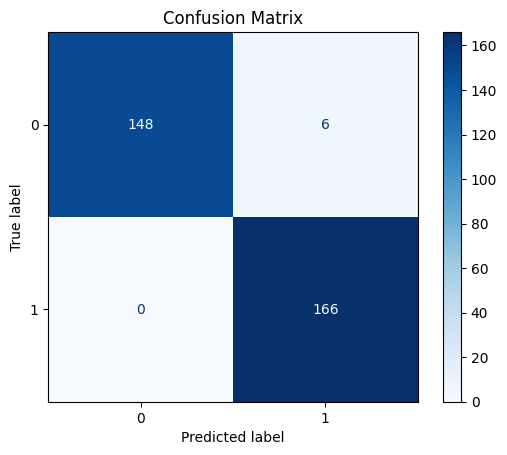

Using DecisionTree


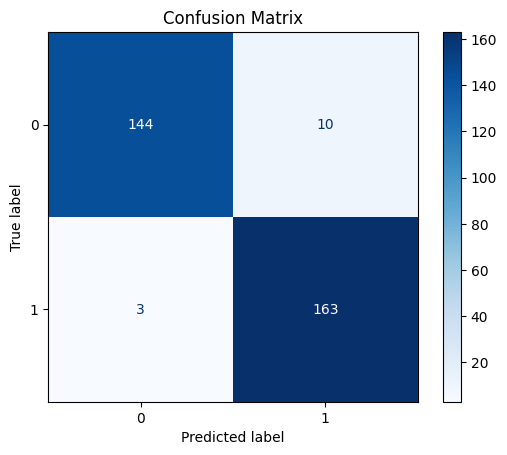

Using Randomforest


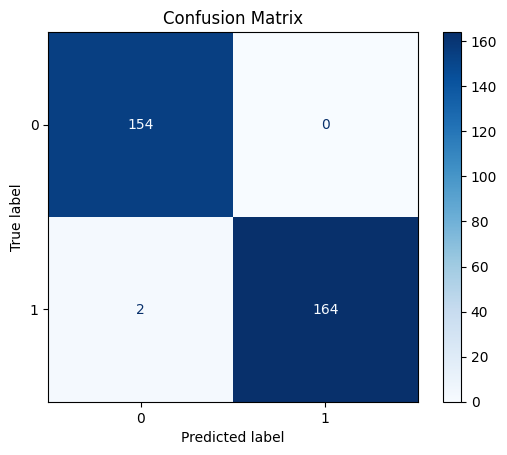

Using svc


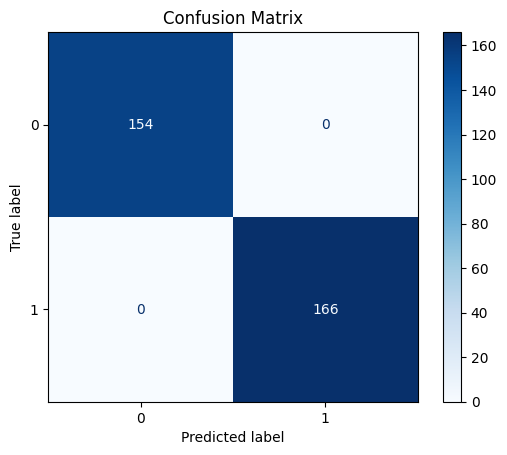

Using KNeighborsClassifier


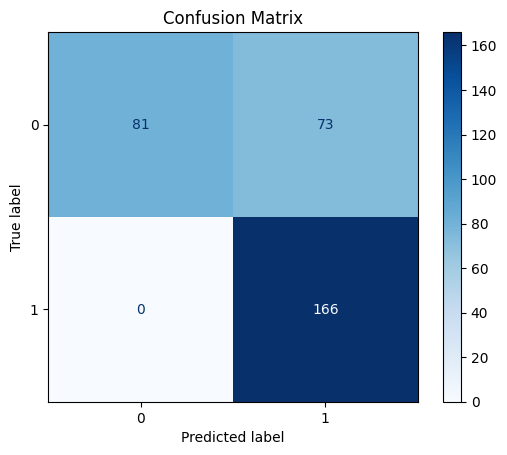

Using GaussianNB


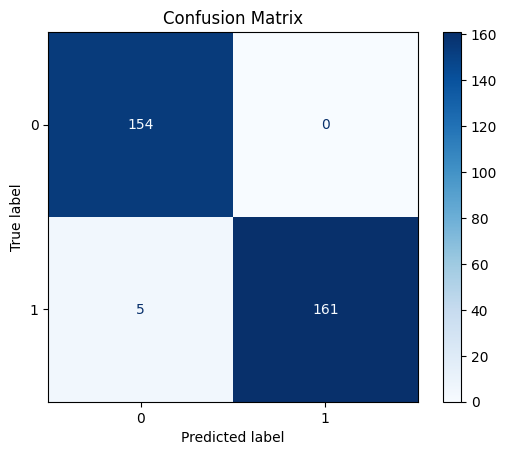

Using XGBClassifier


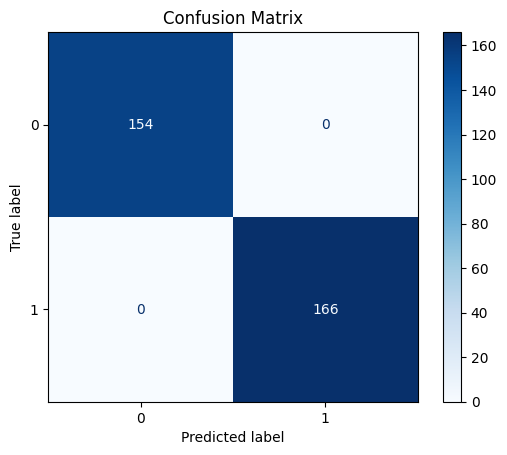

                LogisticRegression  DecisionTree  Randomforest  SVC       KNN  \
training_score            1.000000      1.000000      1.000000  1.0  1.000000   
test_score                0.981250      0.959375      0.993750  1.0  0.771875   
accuracy                  0.981250      0.959375      0.993750  1.0  0.771875   
recall                    1.000000      0.981928      0.987952  1.0  1.000000   
precision                 0.965116      0.942197      1.000000  1.0  0.694561   
f1_score                  0.982249      0.961652      0.993939  1.0  0.819753   
aus_score                 0.980519      0.958496      0.993976  1.0  0.762987   

                GaussianNB  XGBClassifier  
training_score    0.992188            1.0  
test_score        0.984375            1.0  
accuracy          0.984375            1.0  
recall            0.969880            1.0  
precision         1.000000            1.0  
f1_score          0.984709            1.0  
aus_score         0.984940            1.0  

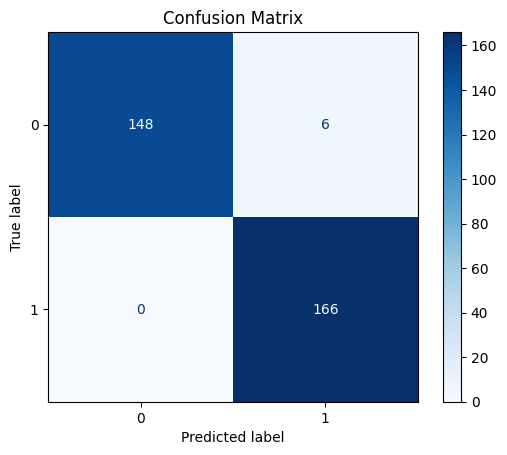

Using DecisionTree


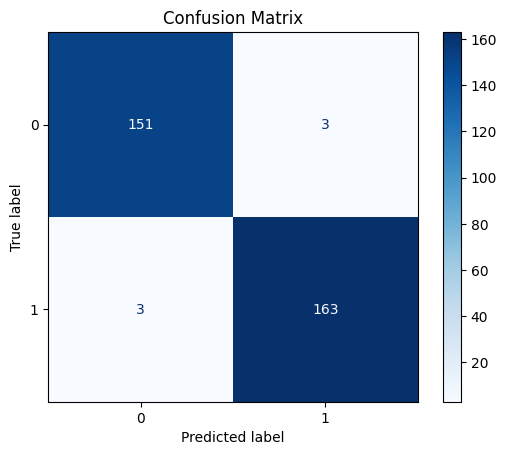

Using Randomforest


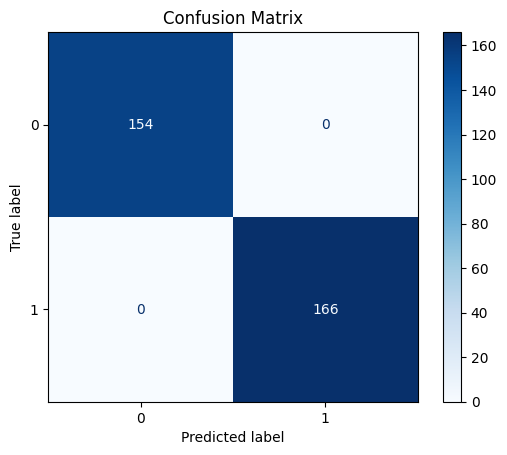

Using svc


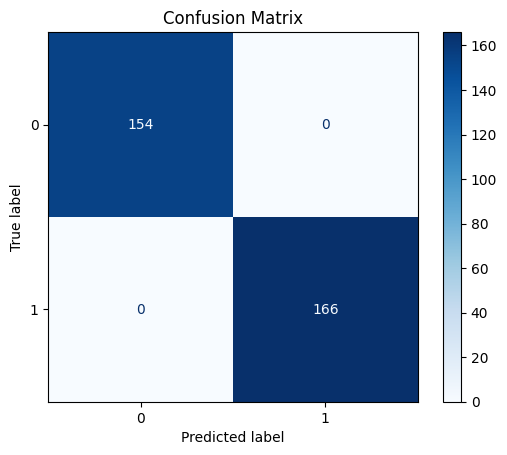

Using KNeighborsClassifier


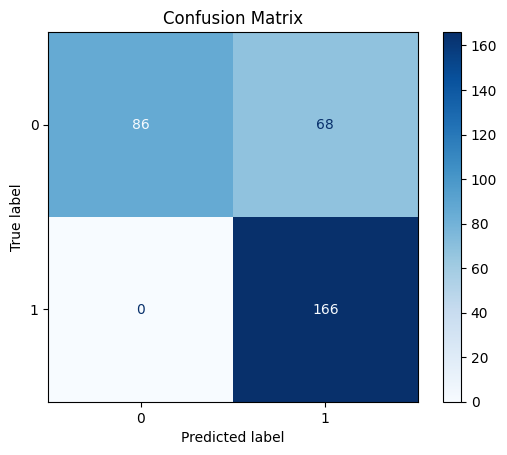

Using GaussianNB


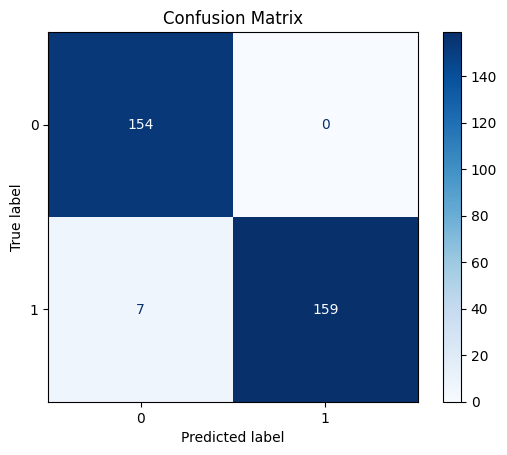

Using XGBClassifier


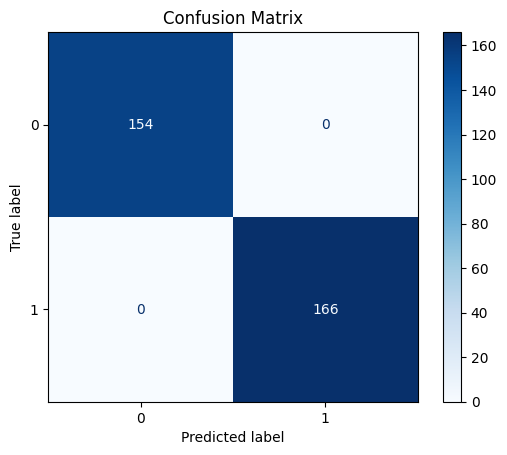

                LogisticRegression  DecisionTree  Randomforest  SVC       KNN  \
training_score            1.000000      1.000000           1.0  1.0  1.000000   
test_score                0.981250      0.981250           1.0  1.0  0.787500   
accuracy                  0.981250      0.981250           1.0  1.0  0.787500   
recall                    1.000000      0.981928           1.0  1.0  1.000000   
precision                 0.965116      0.981928           1.0  1.0  0.709402   
f1_score                  0.982249      0.981928           1.0  1.0  0.830000   
aus_score                 0.980519      0.981224           1.0  1.0  0.779221   

                GaussianNB  XGBClassifier  
training_score    0.992188            1.0  
test_score        0.978125            1.0  
accuracy          0.978125            1.0  
recall            0.957831            1.0  
precision         1.000000            1.0  
f1_score          0.978462            1.0  
aus_score         0.978916            1.0  

In [73]:
for clster in range(3):
    data = dataset_[dataset_['Cluster']==clster]
    X = dataset.drop(columns=['Output','Cluster'])
    y = dataset['Output'].map({-1: 0, 1: 1})
    print(experiment(X,y))

Using logistcregression


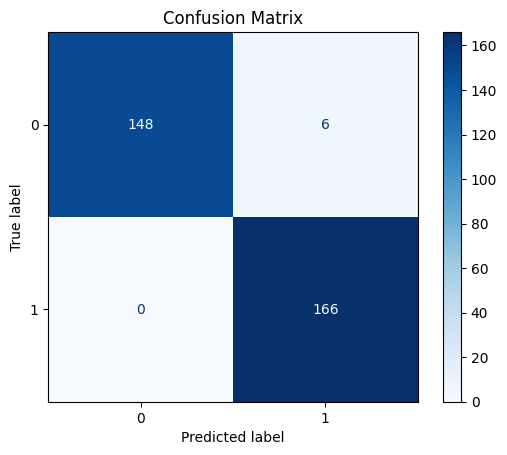

Using DecisionTree


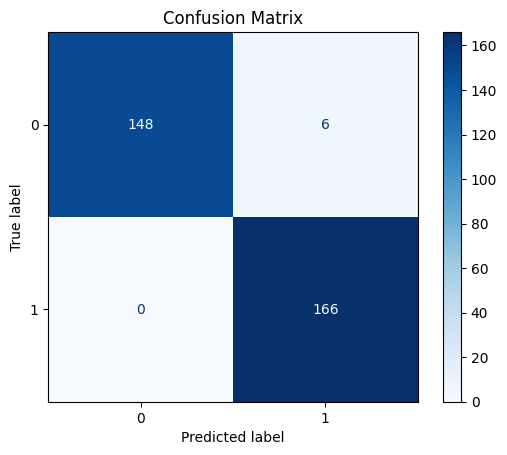

Using Randomforest


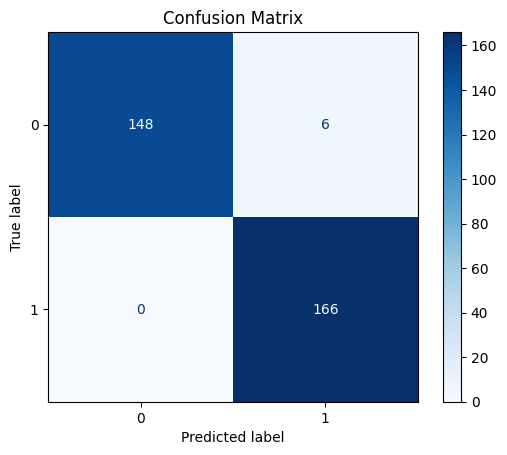

Using svc


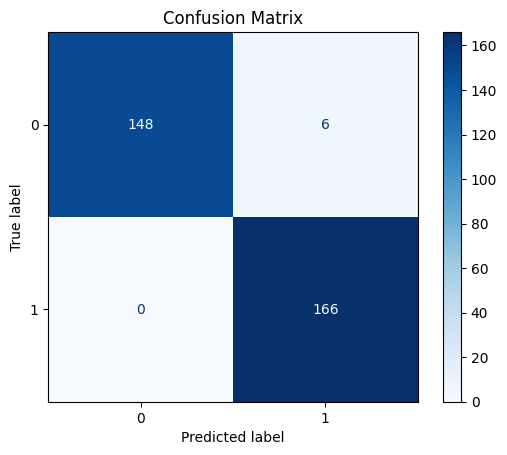

Using KNeighborsClassifier


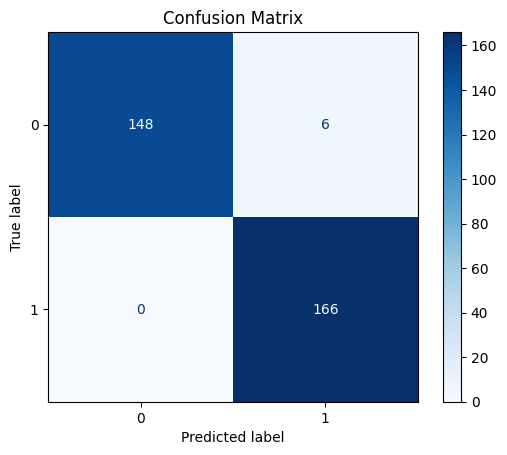

Using GaussianNB


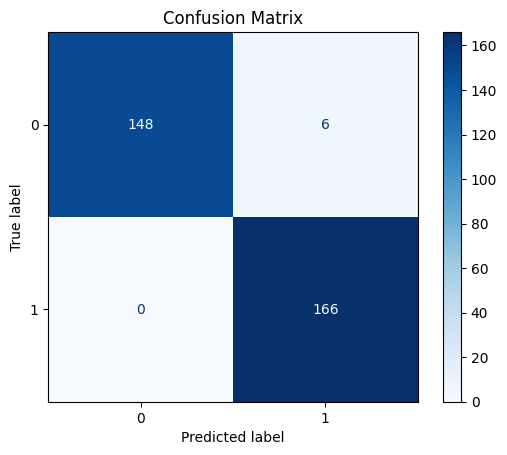

Using XGBClassifier


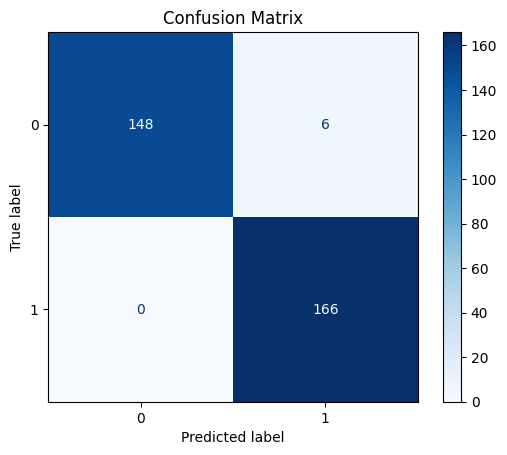

,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,1.000000,1.000000,1.000000,1.000000,1.000000,0.986719,1.000000
test_score,0.981250,0.987500,1.000000,1.000000,0.790625,0.978125,1.000000
accuracy,0.981250,0.981250,0.981250,0.981250,0.981250,0.981250,0.981250
recall,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
precision,0.965116,0.965116,0.965116,0.965116,0.965116,0.965116,0.965116
f1_score,0.982249,0.982249,0.982249,0.982249,0.982249,0.982249,0.982249
aus_score,0.980519,0.980519,0.980519,0.980519,0.980519,0.980519,0.980519


In [20]:
experiment(X,y)

In [60]:
def logistic_rgression_hyperparamet(X,y):
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],  # Solvers compatible with l1 and l2
    }
    model = LogisticRegression(max_iter=1000)
    print('LogisticRegression')
    # Setup GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='roc_auc', n_jobs=-1)

    # # Fit model
    grid_search.fit(X_train, y_train)

    # # Best parameters and score
    # Evaluate and display results
    result_dict= {}
    y_pred = grid_search.predict(X_test)
    result_dict['SVC'] = {
        'training_score': grid_search.score(X_train, y_train),
        'test_score': grid_search.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", grid_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [6]:
X = dataset_.drop(columns=['Output','Cluster'])
y = dataset_['Output'].map({-1: 0, 1: 1})

In [9]:
logistic_rgression_hyperparamet(X,y)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best F1 Score: 0.9534085865313049


e:\data science\Projects\SENSOR-FAULT-DETECTION\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
def svc_hyperapameter(X,y):
    result_dict = {}
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    print("Using SVC")
    # Define hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'degree': [2, 3, 4],  # Only used if kernel is 'poly'
        'class_weight': [None, 'balanced']
    }

    grid_search = RandomizedSearchCV(SVC(), param_grid, cv=k_fold, scoring='roc_auc', n_jobs=-1,random_state=)    
    grid_search.fit(X_train,y_train)
    
    # # Best parameters and score
    # Evaluate and display results
    result_dict= {}
    y_pred = grid_search.predict(X_test)
    result_dict['SVC'] = {
        'training_score': grid_search.score(X_train, y_train),
        'test_score': grid_search.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", grid_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [81]:
def DecisionTreeClassifier_hyperapameter(X,y):
    result_dict = {}
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    # Define the parameter grid
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
        'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50],
        'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1],
        'max_features': [None, 'sqrt', 'log2'],
        'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
        'min_impurity_decrease': [0.0, 0.01, 0.02, 0.05, 0.1],
        'class_weight': [None, 'balanced']
    }
    print("DecisionTreeClassifier")
    # Initialize the classifier
    random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Use the best estimator found
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate and display results
    result_dict['SVC'] = {
        'training_score': best_model.score(X_train, y_train),
        'test_score': best_model.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", random_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


In [82]:
def RandomForestClassifier_hyperapameter(X,y):
    result_dict = {}
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)

        # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }
    print('RandomForestClassifier')

    random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Use the best estimator found
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate and display results
    result_dict['SVC'] = {
        'training_score': best_model.score(X_train, y_train),
        'test_score': best_model.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", random_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [83]:
def XGBClassifier_hyperapameter(X,y):

    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 8, 10],
        'min_child_weight': [1, 3, 5, 7],
        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],
        'reg_lambda': [0, 0.1, 0.5, 1, 5, 10]
    }

    # Split the data into training and validation y_train
    X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    print('XGBClassifier')
    
    random_search = RandomizedSearchCV(XGBClassifier(), param_grid, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Use the best estimator found
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    result_dict ={}
    # Evaluate and display results
    result_dict['SVC'] = {
        'training_score': best_model.score(X_train, y_train),
        'test_score': best_model.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", random_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [14]:
def KNeighborsClassifier_hyperapameter(X,y):
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    # Define hyperparameter grid
    
    param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],      # Number of neighbors
    'weights': ['uniform', 'distance'],   # Weighting function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for neighbors search
    'leaf_size': [10, 20, 30, 40],        # Leaf size for the tree
    'p': [1, 2]                           # Distance metric
    }

    print('KNeighborsClassifier')
    # Define GridSearchCV with accuracy as the scoring metric
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring='roc_auc')

    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)

    # Best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Score: {best_score}")

In [62]:
def GaussianNB_hyperapameter(X,y):
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    # Define hyperparameter grid
    
    #Hyperparameter grid
    param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Tuning var_smoothing for GaussianNB
    }
    print('GaussianNB')
    # GridSearchCV
    grid_search = GridSearchCV(GaussianNB(), param_grid, cv=k_fold, scoring='roc_auc', n_jobs=-1)

    # Fit model
    grid_search.fit(X_train, y_train)

    # # Best parameters and score
    # Evaluate and display results
    result_dict= {}
    y_pred = grid_search.predict(X_test)
    result_dict['SVC'] = {
        'training_score': grid_search.score(X_train, y_train),
        'test_score': grid_search.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", grid_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [70]:
def hyperparameter_tuning(X,Y):
    print(logistic_rgression_hyperparamet(X,y))
    # print(KNeighborsClassifier_hyperapameter(X,y))
    print(GaussianNB_hyperapameter(X,y))
    print(svc_hyperapameter2(X,y))
    # print(DecisionTreeClassifier_hyperapameter(X,y))
    # print(RandomForestClassifier_hyperapameter(X,y))
    # print(XGBClassifier_hyperapameter(X,y))

Cluster : 0
LogisticRegression
Best Parameters from Random Search: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
ROC AUC Score: 0.9580269128461899
{'SVC': {'training_score': np.float64(0.9958468029416648), 'test_score': np.float64(0.9918244406196214), 'accuracy': 0.959375, 'recall': np.float64(0.9939759036144579), 'precision': np.float64(0.9322033898305084), 'f1_score': np.float64(0.9620991253644315), 'auc_score': np.float64(0.9580269128461899)}}


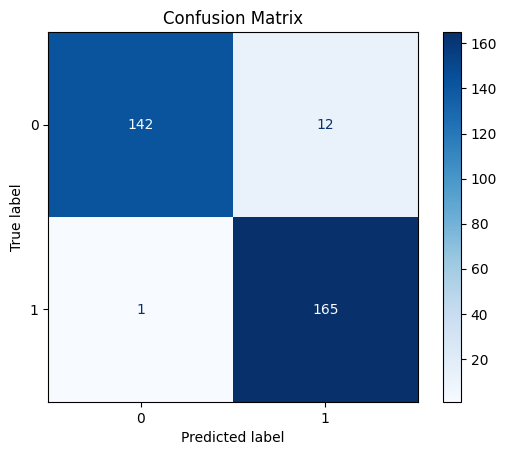

None
GaussianNB
Best Parameters from Random Search: {'var_smoothing': 1e-09}
ROC AUC Score: 0.9819277108433735
{'SVC': {'training_score': np.float64(1.0), 'test_score': np.float64(1.0), 'accuracy': 0.98125, 'recall': np.float64(0.963855421686747), 'precision': np.float64(1.0), 'f1_score': np.float64(0.9815950920245399), 'auc_score': np.float64(0.9819277108433735)}}


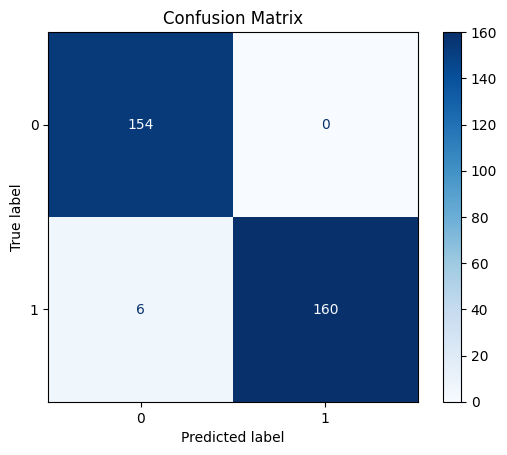

None
Best Parameters from Random Search: {'kernel': 'poly', 'gamma': 0.001, 'C': 10}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


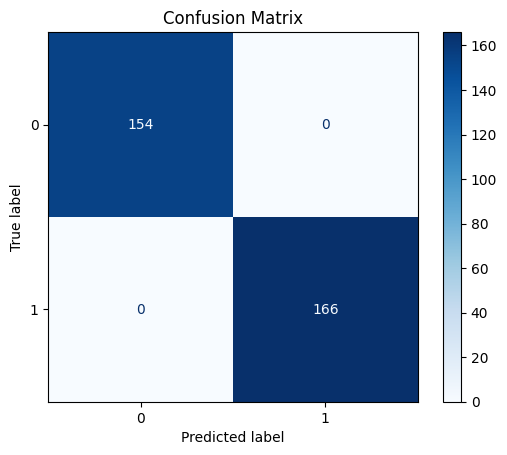

None
--------------------
Cluster : 1
LogisticRegression
Best Parameters from Random Search: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
ROC AUC Score: 0.9642857142857143
{'SVC': {'training_score': np.float64(0.9957369300036136), 'test_score': np.float64(0.9913550305116571), 'accuracy': 0.965625, 'recall': np.float64(1.0), 'precision': np.float64(0.9378531073446328), 'f1_score': np.float64(0.967930029154519), 'auc_score': np.float64(0.9642857142857143)}}


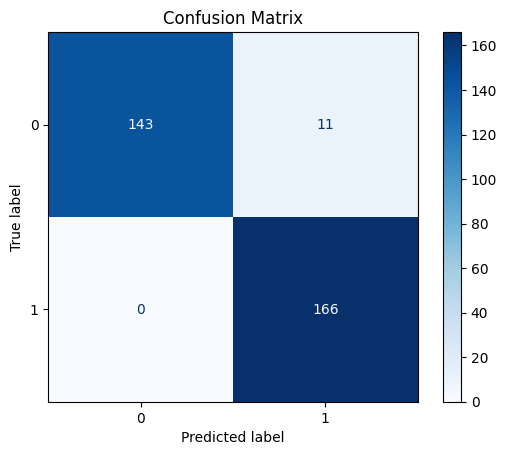

None
GaussianNB
Best Parameters from Random Search: {'var_smoothing': 1e-09}
ROC AUC Score: 0.9909638554216867
{'SVC': {'training_score': np.float64(1.0), 'test_score': np.float64(1.0), 'accuracy': 0.990625, 'recall': np.float64(0.9819277108433735), 'precision': np.float64(1.0), 'f1_score': np.float64(0.9908814589665653), 'auc_score': np.float64(0.9909638554216867)}}


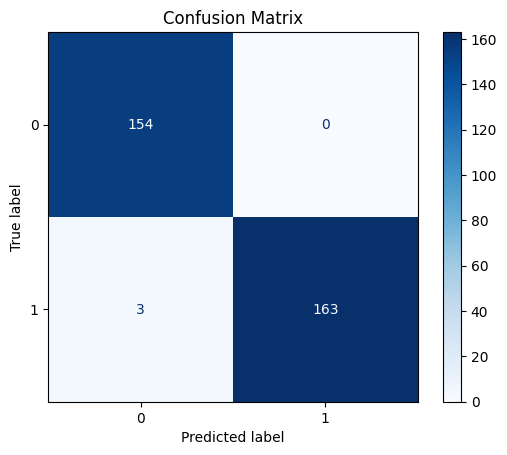

None
Best Parameters from Random Search: {'kernel': 'poly', 'gamma': 0.001, 'C': 10}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


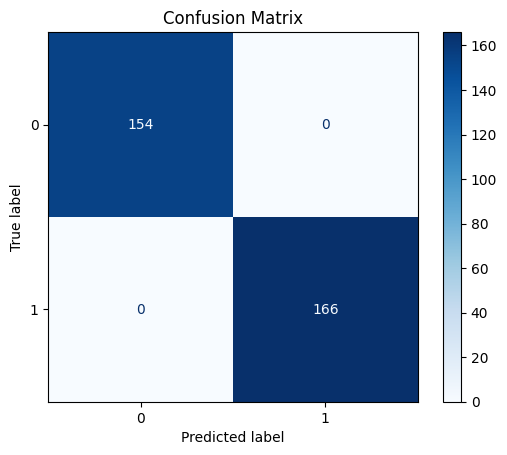

None
--------------------
Cluster : 2
LogisticRegression
Best Parameters from Random Search: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
ROC AUC Score: 0.9772727272727273
{'SVC': {'training_score': np.float64(1.0), 'test_score': np.float64(0.9905335628227194), 'accuracy': 0.978125, 'recall': np.float64(1.0), 'precision': np.float64(0.9595375722543352), 'f1_score': np.float64(0.9793510324483776), 'auc_score': np.float64(0.9772727272727273)}}


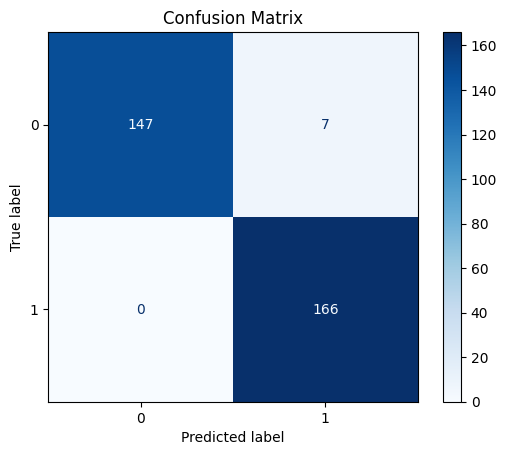

None
GaussianNB
Best Parameters from Random Search: {'var_smoothing': 1e-09}
ROC AUC Score: 0.9789156626506024
{'SVC': {'training_score': np.float64(1.0), 'test_score': np.float64(1.0), 'accuracy': 0.978125, 'recall': np.float64(0.9578313253012049), 'precision': np.float64(1.0), 'f1_score': np.float64(0.9784615384615385), 'auc_score': np.float64(0.9789156626506024)}}


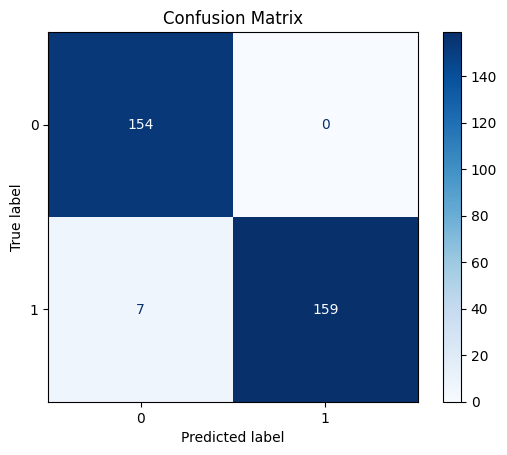

None
Best Parameters from Random Search: {'kernel': 'poly', 'gamma': 0.001, 'C': 10}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


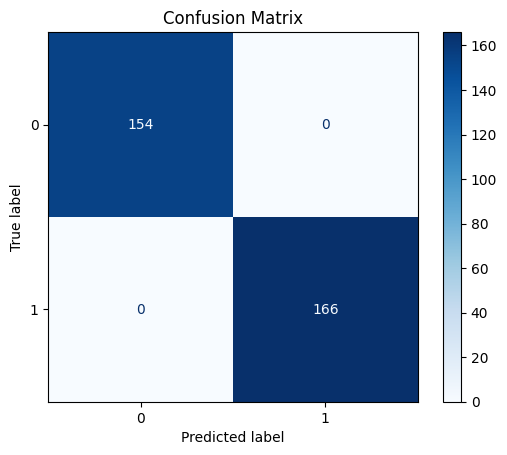

None
--------------------


In [71]:
for clster in range(3):
    data = dataset_[dataset_['Cluster']==clster]
    X = dataset.drop(columns=['Output','Cluster'])
    y = dataset['Output'].map({-1: 0, 1: 1})
    print(f'Cluster : {clster}')
    hyperparameter_tuning(X,y)
    print("-"*20)

In [37]:
svc_hyperapameter(X,y)

Using SVC
Best Parameters: {'C': 0.001, 'class_weight': None, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Best auc_roc Score: 1.0


In [42]:
def experiment2(X,y):
    result_dict = {}
    # X = df.drop(columns=['Good/Bad'])
    # y = df['Good/Bad']
    # y = np.where(y==-1,1,0)
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    
    print("Using logistcregression")
    best_param = {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
    model = LogisticRegression(**best_param)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['LogisticRegression'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    # # Display confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
   
    
    
    print("Using svc")
    Best_Parameters = {'C': 0.001, 'degree': 2, 'class_weight':'balanced','gamma': 0.01, 'kernel': 'rbf'}
    model = SVC(**Best_Parameters)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['SVC'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    


    print("Using GaussianNB")
    best_param = {'var_smoothing': 1e-09}
    model = GaussianNB(**best_param)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    result_dict['GaussianNB'] = {'training_score':model.score(X_train,y_train),
                                         'test_score':model.score(X_test,y_test),
                                         'accuracy': accuracy_score(y_test,y_pred),
                                        'recall' : recall_score(y_test,y_pred),
                                        'precision': precision_score(y_test,y_pred),
                                        'f1_score' : f1_score(y_test,y_pred),
                                        'aus_score' : roc_auc_score(y_test,y_pred)
                                         }
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


    return pd.DataFrame(result_dict)
     

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def svc_hyperapameter2(X,y):
    result_dict = {}
    scalar = StandardScaler()
    x_scaled = scalar.fit_transform(X)
    smote = SMOTE()
    X_res,y_res =  smote.fit_resample(x_scaled,y) # type: ignore
    pca = PCA(n_components=0.99)
    pca_data = pca.fit_transform(X_res) # type: ignore
    
    X_train,X_test,y_train,y_test = train_test_split(pca_data,y_res,test_size=0.20,random_state=100)
    # Define parameter grid including default-like settings
    

    # Define a broader parameter grid for randomized search
    param_distributions = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.0001, 0.001, 0.01, 0.1, 'scale', 'auto'],
        'kernel': ['rbf', 'linear', 'poly']
    }

    # Use RandomizedSearchCV for a broader exploration of parameter space
    random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Use the best estimator found
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate and display results
    result_dict['SVC'] = {
        'training_score': best_model.score(X_train, y_train),
        'test_score': best_model.score(X_test, y_test),
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    print("Best Parameters from Random Search:", random_search.best_params_)
    print("ROC AUC Score:", result_dict['SVC']['auc_score'])
    print(result_dict)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()



Cluster : 0
Best Parameters from Random Search: {'kernel': 'poly', 'gamma': 0.001, 'C': 10}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


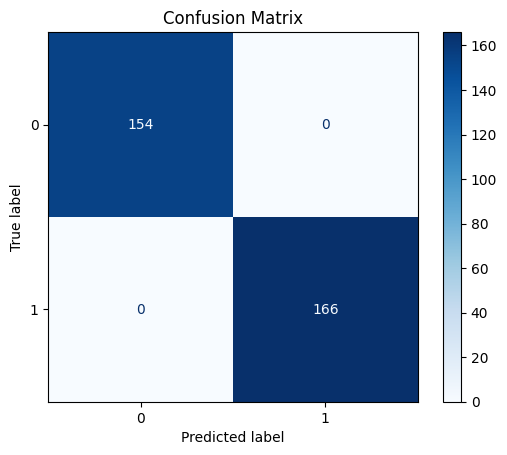

None
--------------------
Cluster : 1
Best Parameters from Random Search: {'kernel': 'poly', 'gamma': 0.001, 'C': 10}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


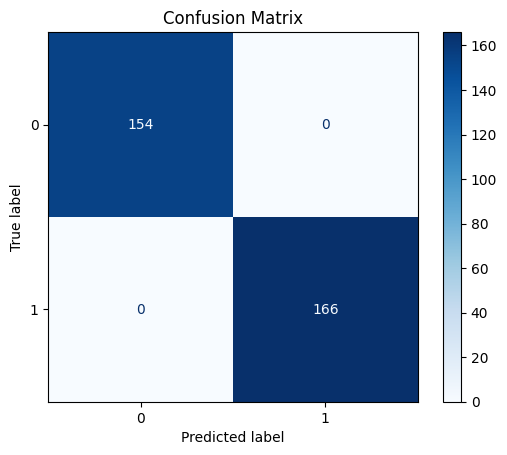

None
--------------------
Cluster : 2
Best Parameters from Random Search: {'kernel': 'poly', 'gamma': 0.001, 'C': 10}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


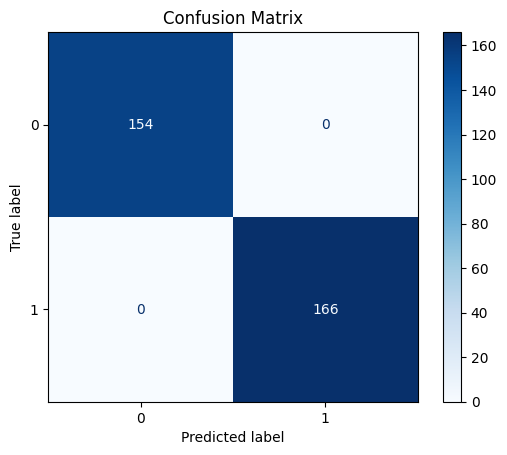

None
--------------------


In [54]:
for clster in range(3):
    data = dataset_[dataset_['Cluster']==clster]
    X = dataset.drop(columns=['Output','Cluster'])
    y = dataset['Output'].map({-1: 0, 1: 1})
    print(f'Cluster : {clster}')
    print(svc_hyperapameter2(X,y))
    print("-"*20)

In [59]:
for clster in range(3):
    data = dataset_[dataset_['Cluster']==clster]
    X = dataset.drop(columns=['Output','Cluster'])
    y = dataset['Output'].map({-1: 0, 1: 1})
    print(f'Cluster : {clster}')
    print(hyperparameter_tuning(X,y))
    print("-"*20)

Cluster : 0
LogisticRegression
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best auc_roc Score: 0.9805567998658619
None
GaussianNB
Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 1.0000
None
Using SVC
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'class_weight': None, 'C': 100}
Best auc_roc Score: 1.0
None
None
--------------------
Cluster : 1
LogisticRegression
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best auc_roc Score: 0.980014974502247
None
GaussianNB
Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 1.0000
None
Using SVC
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'class_weight': 'balanced', 'C': 0.01}
Best auc_roc Score: 1.0
None
None
--------------------
Cluster : 2
LogisticRegression
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best auc_roc Score: 0.9812182488201099
None
GaussianNB
Best parameters: {'var_smoothing': 1e-09}
Best cros

In [78]:
## expirements with trees;
def trees_hyperaparamter_tuning(X,y):
    DecisionTreeClassifier_hyperapameter(X,y)
    RandomForestClassifier_hyperapameter(X,y)
    XGBClassifier_hyperapameter(X,y)
    
    

Cluster : 0
DecisionTreeClassifier
Best Parameters from Random Search: {'splitter': 'best', 'min_weight_fraction_leaf': 0.05, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 50, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced'}
ROC AUC Score: 0.9327570020341106
{'SVC': {'training_score': 0.94921875, 'test_score': 0.934375, 'accuracy': 0.934375, 'recall': np.float64(0.9759036144578314), 'precision': np.float64(0.9050279329608939), 'f1_score': np.float64(0.9391304347826087), 'auc_score': np.float64(0.9327570020341106)}}


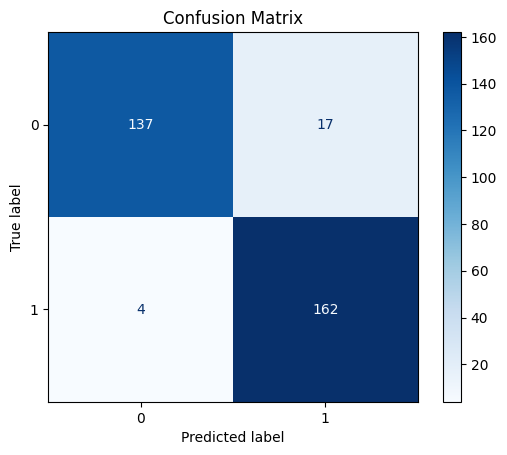

RandomForestClassifier
Best Parameters from Random Search: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
ROC AUC Score: 0.9939759036144578
{'SVC': {'training_score': 1.0, 'test_score': 0.99375, 'accuracy': 0.99375, 'recall': np.float64(0.9879518072289156), 'precision': np.float64(1.0), 'f1_score': np.float64(0.9939393939393939), 'auc_score': np.float64(0.9939759036144578)}}


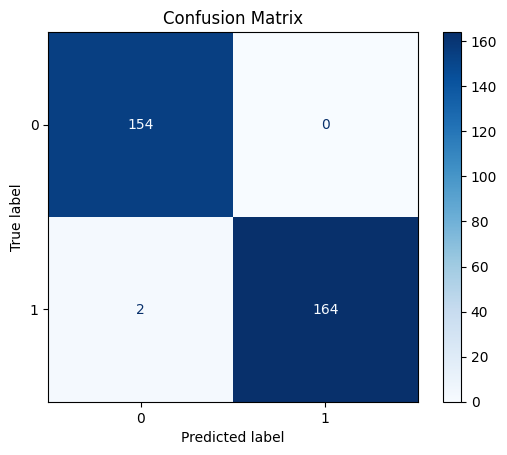

XGBClassifier
Best Parameters from Random Search: {'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.9}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


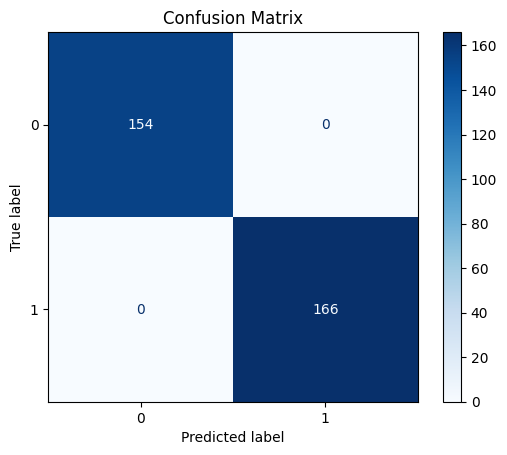

None
--------------------
Cluster : 1
DecisionTreeClassifier
Best Parameters from Random Search: {'splitter': 'best', 'min_weight_fraction_leaf': 0.01, 'min_samples_split': 5, 'min_samples_leaf': 50, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}
ROC AUC Score: 0.9436707870442811
{'SVC': {'training_score': 0.93828125, 'test_score': 0.94375, 'accuracy': 0.94375, 'recall': np.float64(0.9457831325301205), 'precision': np.float64(0.9457831325301205), 'f1_score': np.float64(0.9457831325301205), 'auc_score': np.float64(0.9436707870442811)}}


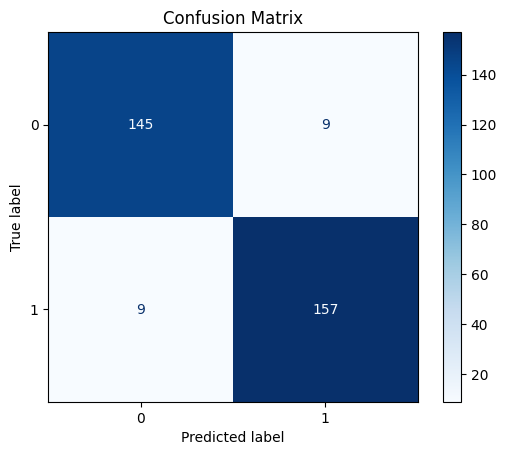

RandomForestClassifier
Best Parameters from Random Search: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
ROC AUC Score: 1.0
{'SVC': {'training_score': 0.99921875, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


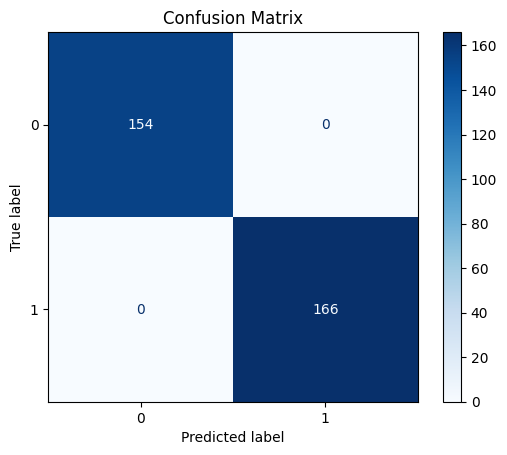

XGBClassifier
Best Parameters from Random Search: {'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.9}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


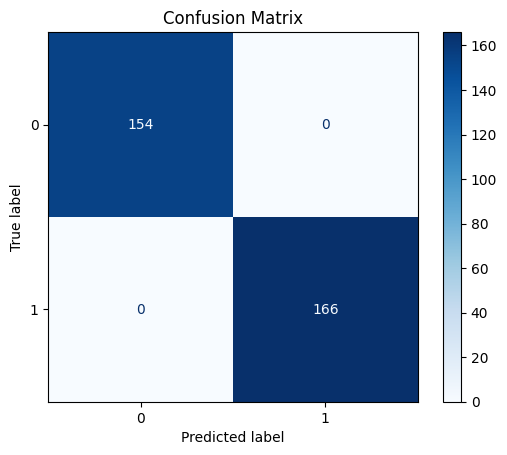

None
--------------------
Cluster : 2
DecisionTreeClassifier
Best Parameters from Random Search: {'splitter': 'best', 'min_weight_fraction_leaf': 0.05, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 50, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced'}
ROC AUC Score: 0.916288530746362
{'SVC': {'training_score': 0.93828125, 'test_score': 0.91875, 'accuracy': 0.91875, 'recall': np.float64(0.9819277108433735), 'precision': np.float64(0.8763440860215054), 'f1_score': np.float64(0.9261363636363636), 'auc_score': np.float64(0.916288530746362)}}


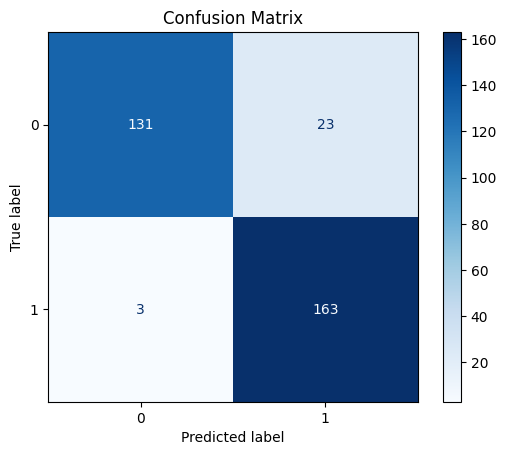

RandomForestClassifier
Best Parameters from Random Search: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
ROC AUC Score: 0.9969879518072289
{'SVC': {'training_score': 1.0, 'test_score': 0.996875, 'accuracy': 0.996875, 'recall': np.float64(0.9939759036144579), 'precision': np.float64(1.0), 'f1_score': np.float64(0.9969788519637462), 'auc_score': np.float64(0.9969879518072289)}}


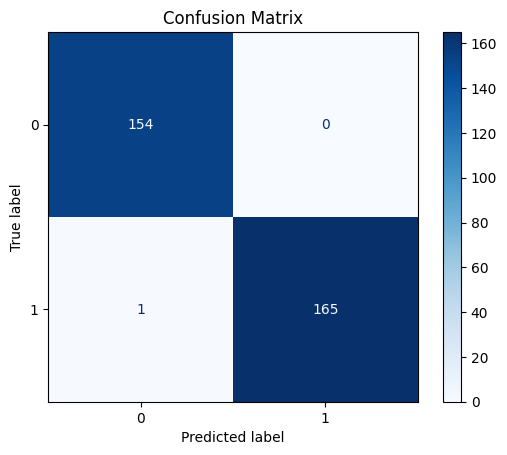

XGBClassifier
Best Parameters from Random Search: {'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.9}
ROC AUC Score: 1.0
{'SVC': {'training_score': 1.0, 'test_score': 1.0, 'accuracy': 1.0, 'recall': np.float64(1.0), 'precision': np.float64(1.0), 'f1_score': np.float64(1.0), 'auc_score': np.float64(1.0)}}


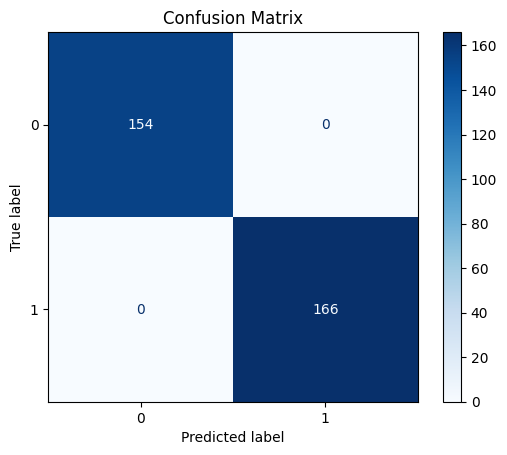

None
--------------------


In [84]:
for clster in range(3):
    data = dataset_[dataset_['Cluster']==clster]
    X = dataset.drop(columns=['Output','Cluster'])
    y = dataset['Output'].map({-1: 0, 1: 1})
    print(f'Cluster : {clster}')
    print(trees_hyperaparamter_tuning(X,y))
    print("-"*20)